# Kemans

In [1]:
# %load basic
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',200)
pd.options.display.float_format = '{:.2f}'.format
liga = '/home/ef/Documents/Diplomado/data/Mod_III/'
os.listdir(liga)

['pokemon (1).csv',
 'pokemon_cluster.csv',
 'ratings.csv',
 'pokemon_cluster',
 'tags.csv',
 'digits_train_sample.csv',
 'movies.csv']

In [2]:
df = pd.read_csv(liga + 'pokemon (1).csv')
df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

## Num

In [3]:
df.drop(773, axis = 0, inplace = True)
df['capture_rate'] = df['capture_rate'].astype(float)
backup = df.copy()

## Cat

In [4]:
num = [x for x in df.describe().columns]
cat = [x for x in df.columns if x not in num]
df[cat].sample(4)

,abilities,classfication,japanese_name,name,type1,type2
9,"['Shield Dust', 'Run Away']",Worm Pokémon,Caterpieキャタピー,Caterpie,bug,NaN
26,"['Sand Veil', 'Sand Rush', 'Snow Cloak', 'Slus...",Mouse Pokémon,Sandサンド,Sandshrew,ground,ice
489,['Hydration'],Seafaring Pokémon,Manaphyマナフィ,Manaphy,water,NaN
698,"['Refrigerate', 'Snow Warning']",Tundra Pokémon,Amarurugaアマルルガ,Aurorus,rock,ice


<AxesSubplot:>

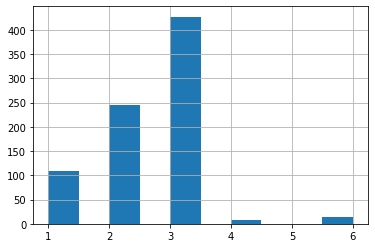

In [5]:
df['abilities'] = df['abilities'].str.replace('[','').str.replace(']','').str.replace("'",'').str.split(',').str.len()
df['abilities'].hist()

In [6]:
df.set_index('name', inplace = True)
df['types'] = (df['type1'] +" "+ df['type2'].fillna('')).str.strip().str.lower()

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range = (1, 1), 
                     min_df = 10, 
                     max_features = 50)
texto = 'types'
cv.fit(df[texto])
words = cv.get_feature_names()
df = df.join(pd.DataFrame(data = cv.transform(df[texto]).todense(), 
                          index = df.index,
                          columns = words))

In [7]:
df.drop(columns = ['height_m','weight_kg','percentage_male','pokedex_number',
                   'classfication','japanese_name','base_happiness'], inplace = True)
df['generation'] = df['generation'].astype(str)
df['is_legendary'] = df['is_legendary'].astype(str)
df['experience_growth'] = df['experience_growth'].astype(str)
#df[''] = df[''].astype(str)
num = [x for x in df.describe().columns]
cat = [x for x in df.columns if x not in num]
df = df[cat + num].copy()
df.sample(4)

,experience_growth,type1,type2,generation,is_legendary,types,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_total,capture_rate,defense,hp,sp_attack,sp_defense,speed,bug,dark,dragon,electric,fairy,fighting,fire,flying,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Zebstrika,1000000,electric,NaN,5,0,electric,3,1.00,1.00,1.00,0.50,1.00,1.00,1.00,0.50,1.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00,0.50,1.00,100,5120,497,75.00,63,75,80,63,116,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Kyogre,1250000,water,NaN,3,1,water,1,1.00,1.00,1.00,2.00,1.00,1.00,0.50,1.00,1.00,2.00,1.00,0.50,1.00,1.00,1.00,1.00,0.50,0.50,150,30720,770,3.00,90,100,180,160,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Cubone,1000000,ground,NaN,1,0,ground,3,1.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,2.00,1.00,2.00,1.00,0.50,1.00,0.50,1.00,2.00,50,5120,320,190.00,95,50,40,50,35,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Poochyena,1000000,dark,NaN,3,0,dark,3,2.00,0.50,1.00,1.00,2.00,2.00,1.00,1.00,0.50,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00,55,3840,220,255.00,35,35,30,30,35,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Kmeans

In [8]:
X = df[num].copy()
X.describe()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_total,capture_rate,defense,hp,sp_attack,sp_defense,speed,bug,dark,dragon,electric,fairy,fighting,fire,flying,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water
count,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00
mean,2.48,1.00,1.06,0.97,1.07,1.07,1.07,1.14,1.19,0.98,1.03,1.10,1.21,0.89,0.98,1.01,1.25,0.98,1.06,77.83,7192.00,428.29,98.76,73.03,68.97,71.27,70.92,66.27,0.10,0.06,0.06,0.06,0.06,0.07,0.08,0.12,0.05,0.12,0.08,0.05,0.14,0.08,0.10,0.07,0.06,0.16
std,0.86,0.60,0.44,0.35,0.65,0.52,0.72,0.69,0.60,0.56,0.79,0.74,0.74,0.27,0.55,0.50,0.70,0.50,0.61,32.17,6562.26,119.25,76.26,30.78,26.59,32.36,27.96,28.86,0.30,0.24,0.23,0.24,0.24,0.25,0.28,0.33,0.22,0.33,0.28,0.21,0.34,0.28,0.30,0.26,0.23,0.37
min,1.00,0.25,0.25,0.00,0.00,0.25,0.00,0.25,0.25,0.00,0.25,0.00,0.25,0.00,0.00,0.00,0.25,0.25,0.25,5.00,1280.00,180.00,3.00,5.00,1.00,10.00,20.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2.00,0.50,1.00,1.00,0.50,1.00,0.50,0.50,1.00,1.00,0.50,1.00,0.50,1.00,0.50,1.00,1.00,0.50,0.50,55.00,5120.00,320.00,45.00,50.00,50.00,45.00,50.00,45.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,3.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,75.00,5120.00,435.00,60.00,70.00,65.00,65.00,66.00,65.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,3.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,1.00,1.00,1.00,1.00,2.00,1.00,1.00,1.00,2.00,1.00,1.00,100.00,5440.00,505.00,170.00,90.00,80.00,91.00,90.00,85.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,6.00,4.00,4.00,2.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,1.00,4.00,4.00,4.00,4.00,4.00,185.00,30720.00,780.00,255.00,230.00,255.00,194.00,230.00,180.00,1.00,1.00,1.00,2.00,1.00,1.00,2.00,1.00,1.00,2.00,2.00,1.00,1.00,2.00,1.00,1.00,1.00,1.00


In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import davies_bouldin_score, silhouette_score, silhouette_samples

sc = MinMaxScaler()
Xs = pd.DataFrame(index = X.index, data = sc.fit_transform(X), columns=X.columns)
Xs.describe()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_total,capture_rate,defense,hp,sp_attack,sp_defense,speed,bug,dark,dragon,electric,fairy,fighting,fire,flying,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water
count,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00
mean,0.30,0.20,0.22,0.48,0.27,0.22,0.27,0.24,0.25,0.25,0.21,0.27,0.26,0.89,0.24,0.25,0.27,0.20,0.22,0.40,0.20,0.41,0.38,0.30,0.27,0.33,0.24,0.35,0.10,0.06,0.06,0.03,0.06,0.07,0.04,0.12,0.05,0.06,0.04,0.05,0.14,0.04,0.10,0.07,0.06,0.16
std,0.17,0.16,0.12,0.18,0.16,0.14,0.18,0.18,0.16,0.14,0.21,0.18,0.20,0.27,0.14,0.12,0.19,0.13,0.16,0.18,0.22,0.20,0.30,0.14,0.10,0.18,0.13,0.16,0.30,0.24,0.23,0.12,0.24,0.25,0.14,0.33,0.22,0.17,0.14,0.21,0.34,0.14,0.30,0.26,0.23,0.37
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.20,0.07,0.20,0.50,0.12,0.20,0.12,0.07,0.20,0.25,0.07,0.25,0.07,1.00,0.12,0.25,0.20,0.07,0.07,0.28,0.13,0.23,0.17,0.20,0.19,0.19,0.14,0.23,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.40,0.20,0.20,0.50,0.25,0.20,0.25,0.20,0.20,0.25,0.20,0.25,0.20,1.00,0.25,0.25,0.20,0.20,0.20,0.39,0.13,0.43,0.23,0.29,0.25,0.30,0.22,0.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.40,0.20,0.20,0.50,0.25,0.20,0.25,0.47,0.20,0.25,0.20,0.25,0.47,1.00,0.25,0.25,0.47,0.20,0.20,0.53,0.14,0.54,0.66,0.38,0.31,0.44,0.33,0.46,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [10]:
sse,db,slc = {}, {}, {}
for k in range(2, 15):
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=10, n_jobs=-1).fit(Xs)
    if k == 3: labels = kmeans.labels_
    clusters = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    db[k] = davies_bouldin_score(Xs,clusters)
    slc[k] = silhouette_score(Xs,clusters)

/home/ef/Desktop/diplomadus/diplomadus/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/home/ef/Desktop/diplomadus/diplomadus/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/home/ef/Desktop/diplomadus/diplomadus/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/home/ef/Desktop/diplomadus/diplomadus/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 a

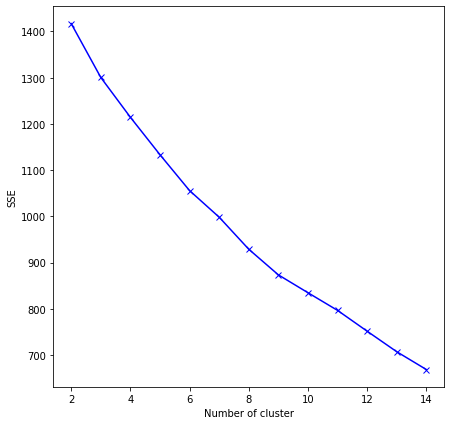

In [11]:
plt.figure(figsize=(7,7))
plt.plot(list(sse.keys()), list(sse.values()), "bx-")
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

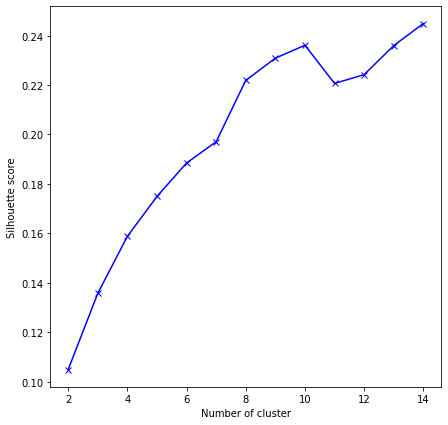

In [12]:
plt.figure(figsize=(7,7))
plt.plot(list(slc.keys()), list(slc.values()), "bx-")
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette score")
plt.show()

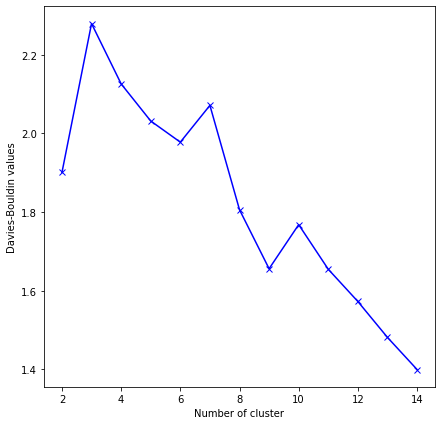

In [13]:
plt.figure(figsize=(7,7))
plt.plot(list(db.keys()), list(db.values()), "bx-")
plt.xlabel("Number of cluster")
plt.ylabel("Davies-Bouldin values")
plt.show()

## Training

In [14]:
cluster = KMeans(n_clusters=12, n_jobs=-1, random_state=10)
Xs['Cluster'] = X['Cluster'] = df['Cluster'] = cluster.fit_predict(Xs)

df['Cluster'].value_counts(1).reset_index().set_index('index')

/home/ef/Desktop/diplomadus/diplomadus/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


,Cluster
index,
2,0.21
0,0.13
5,0.13
4,0.08
7,0.07
8,0.06
3,0.06
1,0.06
11,0.05


In [15]:
backup = backup.set_index('name').join(df['Cluster'])
backup.sample(4)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,Cluster
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Duskull,"['Levitate', 'Frisk']",0.50,2.00,1.00,1.00,1.00,0.00,1.00,1.00,2.00,1.00,1.00,1.00,0.00,0.50,1.00,1.00,1.00,1.00,40,6400,35,295,190.00,Requiem Pokémon,90,800000,0.80,20,Yomawaruヨマワル,50.00,355,30,90,25,ghost,NaN,15.00,3,0,6
Poliwag,"['Water Absorb', 'Damp', 'Swift Swim']",1.00,1.00,1.00,2.00,1.00,1.00,0.50,1.00,1.00,2.00,1.00,0.50,1.00,1.00,1.00,1.00,0.50,0.50,50,5120,70,300,255.00,Tadpole Pokémon,40,1059860,0.60,40,Nyoromoニョロモ,50.00,60,40,40,90,water,NaN,12.40,1,0,0
Slakoth,['Truant'],1.00,1.00,1.00,1.00,1.00,2.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,60,3840,70,280,255.00,Slacker Pokémon,60,1250000,0.80,60,Namakeroナマケロ,50.00,287,35,35,30,normal,NaN,24.00,3,0,5
Beldum,"['Clear Body', 'Light Metal']",1.00,2.00,0.50,1.00,0.50,1.00,2.00,0.50,2.00,0.50,2.00,0.50,0.50,0.00,0.25,0.50,0.50,1.00,55,10240,35,300,3.00,Iron Ball Pokémon,80,1250000,0.60,40,Dumbberダンバル,nan,374,35,60,30,steel,psychic,95.20,3,0,11


In [16]:
backup.reset_index().to_csv(liga + 'pokemon_cluster.csv')

## PCA

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
Xp = pd.DataFrame(data=pca.fit_transform(Xs), index = Xs.index, columns=["p1", "p2"])
Xp.sample(4)

,p1,p2
name,,
Sawsbuck,0.56,0.57
Elekid,-2.45,-0.10
Venusaur,2.54,0.06
Mightyena,4.55,0.09


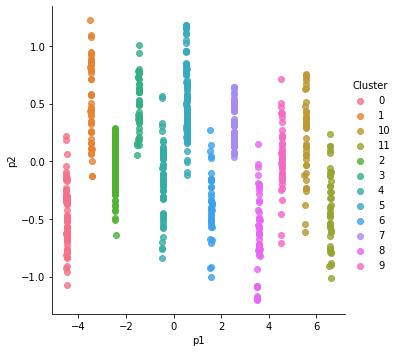

In [19]:
import seaborn as sns
Xp['Cluster'] = Xs['Cluster'].astype(str)
sns.lmplot(data = Xp,
           x = 'p1',
           y = 'p2',
           fit_reg = False, 
           hue = 'Cluster')

<AxesSubplot:xlabel='experience_growth', ylabel='Cluster'>

<AxesSubplot:xlabel='type1', ylabel='Cluster'>

<AxesSubplot:xlabel='type2', ylabel='Cluster'>

<AxesSubplot:xlabel='generation', ylabel='Cluster'>

<AxesSubplot:xlabel='is_legendary', ylabel='Cluster'>

<AxesSubplot:xlabel='types', ylabel='Cluster'>

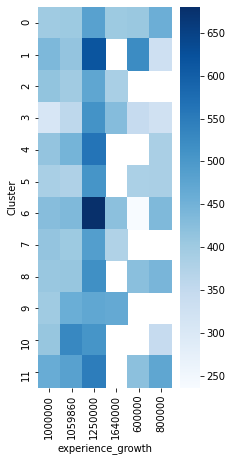

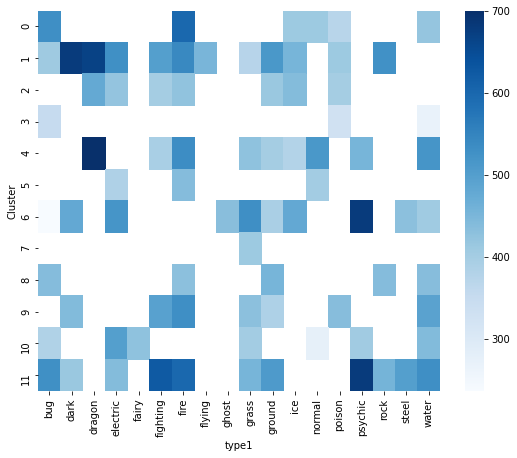

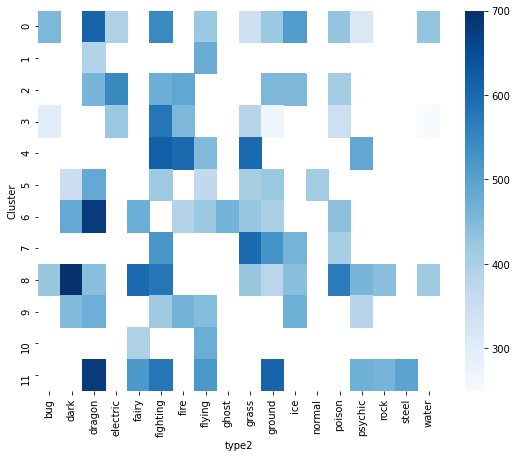

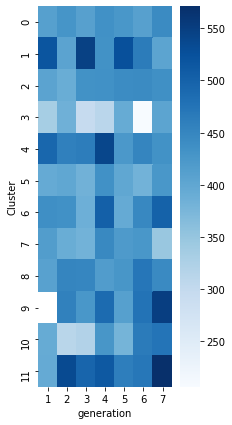

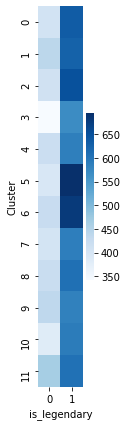

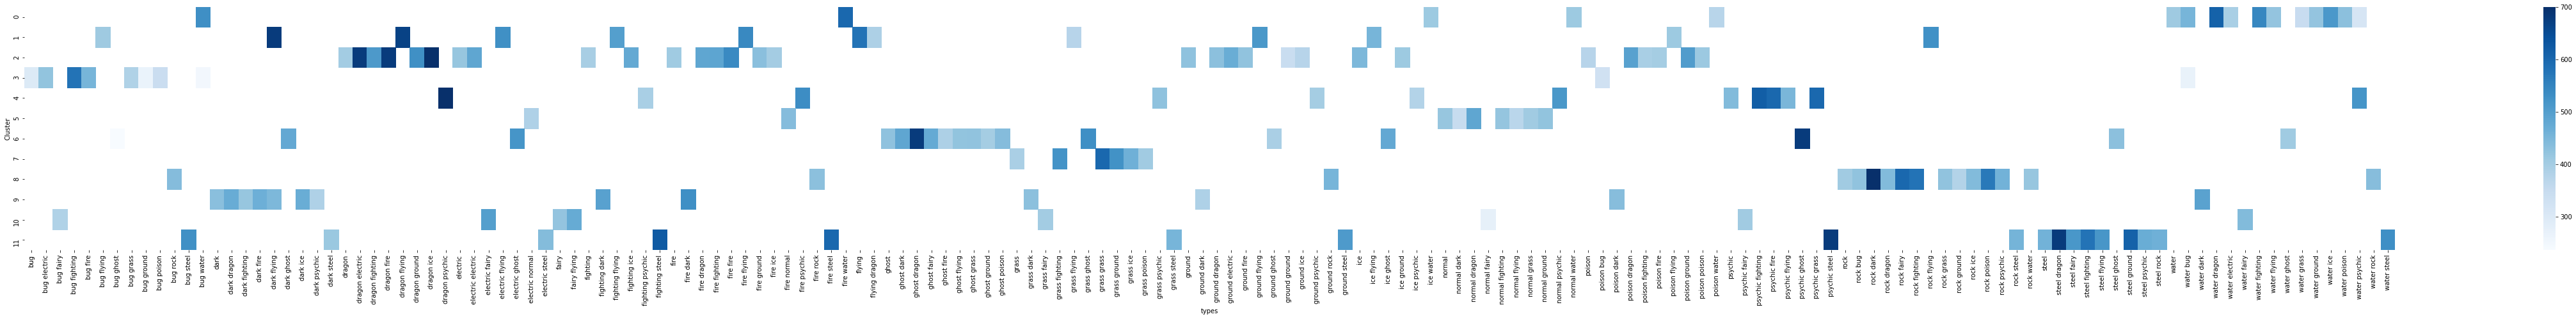

In [20]:
for col in cat[:-1]:
    fig, ax = plt.subplots(figsize=(int(len(set(df[col]))/2),7)) 
    display(sns.heatmap(df.pivot_table(index = 'Cluster', 
                               columns = col,
                               values = 'base_total'), cmap = 'Blues', ax = ax))

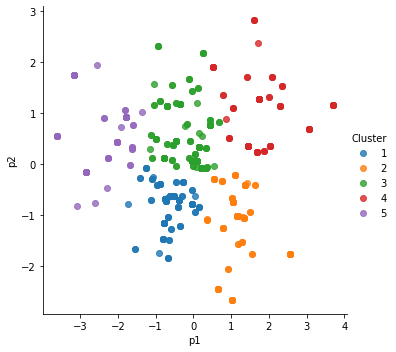

In [21]:
clustera = KMeans(n_clusters=5, random_state=10)
pca = PCA(n_components = 2)
Xa = df[[x for x in df.columns if x.startswith('against_')]]
Xa = pd.DataFrame(data=pca.fit_transform(Xa), index = Xs.index, columns=["p1", "p2"])

Xa['Cluster'] = (clustera.fit_predict(Xa) + 1).astype(str)
sns.lmplot(data = Xa,
           x = 'p1',
           y = 'p2',
           fit_reg = False, 
           hue = 'Cluster')

<AxesSubplot:xlabel='experience_growth', ylabel='Cluster'>

<AxesSubplot:xlabel='experience_growth', ylabel='Cluster'>

<AxesSubplot:xlabel='experience_growth', ylabel='Cluster'>

<AxesSubplot:xlabel='experience_growth', ylabel='Cluster'>

<AxesSubplot:xlabel='type1', ylabel='Cluster'>

<AxesSubplot:xlabel='type1', ylabel='Cluster'>

<AxesSubplot:xlabel='type1', ylabel='Cluster'>

<AxesSubplot:xlabel='type1', ylabel='Cluster'>

<AxesSubplot:xlabel='type2', ylabel='Cluster'>

<AxesSubplot:xlabel='type2', ylabel='Cluster'>

<AxesSubplot:xlabel='type2', ylabel='Cluster'>

<AxesSubplot:xlabel='type2', ylabel='Cluster'>

<AxesSubplot:xlabel='generation', ylabel='Cluster'>

<AxesSubplot:xlabel='generation', ylabel='Cluster'>

<AxesSubplot:xlabel='generation', ylabel='Cluster'>

<AxesSubplot:xlabel='generation', ylabel='Cluster'>

<AxesSubplot:xlabel='is_legendary', ylabel='Cluster'>

<AxesSubplot:xlabel='is_legendary', ylabel='Cluster'>

<AxesSubplot:xlabel='is_legendary', ylabel='Cluster'>

<AxesSubplot:xlabel='is_legendary', ylabel='Cluster'>

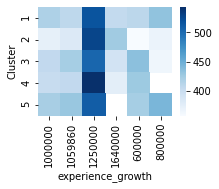

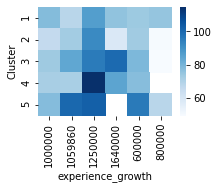

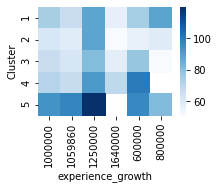

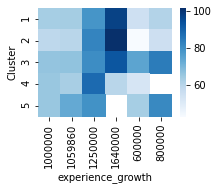

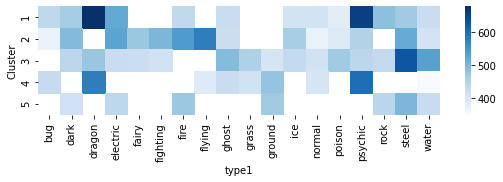

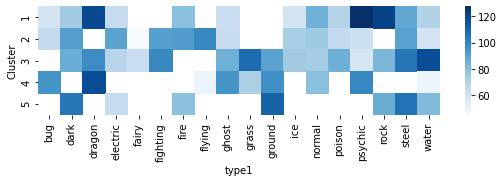

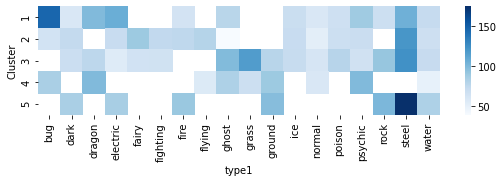

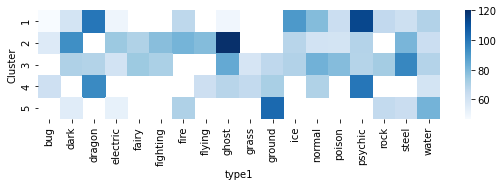

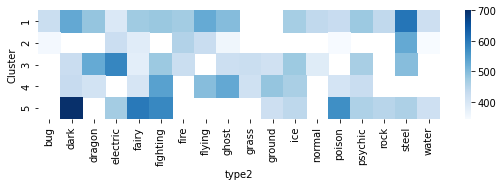

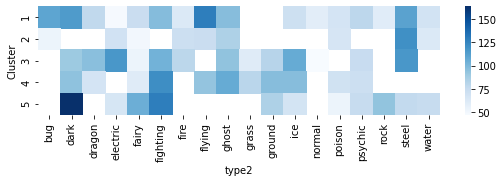

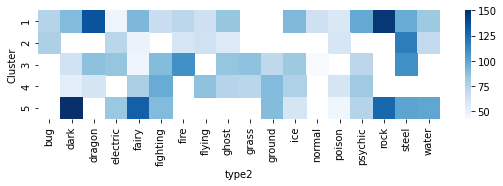

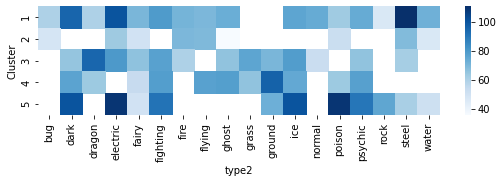

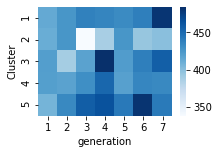

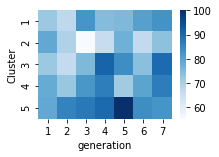

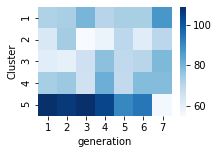

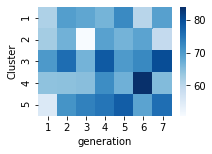

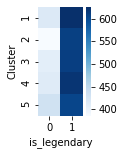

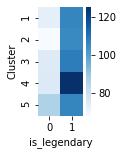

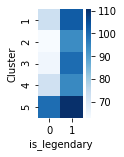

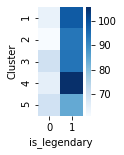

In [27]:
df['Cluster'] = Xa['Cluster']

for col in cat[:-1]:
    for val in ['base_total','attack','defense','hp']:    
        fig, ax = plt.subplots(figsize=(int(len(set(df[col]))/2),2)) 
        display(sns.heatmap(df.pivot_table(index = 'Cluster', 
                                   columns = col,
                                   values = val), 
                            cmap = 'Blues', 
                            ax = ax, 
                            title = val))

<AxesSubplot:title={'center':'base_total'}, xlabel='experience_growth', ylabel='Cluster'>

<AxesSubplot:title={'center':'attack'}, xlabel='experience_growth', ylabel='Cluster'>

<AxesSubplot:title={'center':'defense'}, xlabel='experience_growth', ylabel='Cluster'>

<AxesSubplot:title={'center':'hp'}, xlabel='experience_growth', ylabel='Cluster'>

<AxesSubplot:title={'center':'base_total'}, xlabel='type1', ylabel='Cluster'>

<AxesSubplot:title={'center':'attack'}, xlabel='type1', ylabel='Cluster'>

<AxesSubplot:title={'center':'defense'}, xlabel='type1', ylabel='Cluster'>

<AxesSubplot:title={'center':'hp'}, xlabel='type1', ylabel='Cluster'>

<AxesSubplot:title={'center':'base_total'}, xlabel='type2', ylabel='Cluster'>

<AxesSubplot:title={'center':'attack'}, xlabel='type2', ylabel='Cluster'>

<AxesSubplot:title={'center':'defense'}, xlabel='type2', ylabel='Cluster'>

<AxesSubplot:title={'center':'hp'}, xlabel='type2', ylabel='Cluster'>

<AxesSubplot:title={'center':'base_total'}, xlabel='generation', ylabel='Cluster'>

<AxesSubplot:title={'center':'attack'}, xlabel='generation', ylabel='Cluster'>

<AxesSubplot:title={'center':'defense'}, xlabel='generation', ylabel='Cluster'>

<AxesSubplot:title={'center':'hp'}, xlabel='generation', ylabel='Cluster'>

<AxesSubplot:title={'center':'base_total'}, xlabel='is_legendary', ylabel='Cluster'>

<AxesSubplot:title={'center':'attack'}, xlabel='is_legendary', ylabel='Cluster'>

<AxesSubplot:title={'center':'defense'}, xlabel='is_legendary', ylabel='Cluster'>

<AxesSubplot:title={'center':'hp'}, xlabel='is_legendary', ylabel='Cluster'>

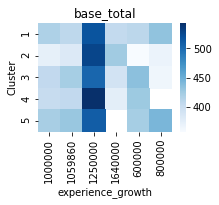

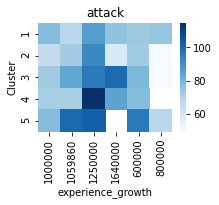

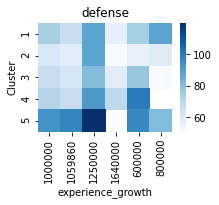

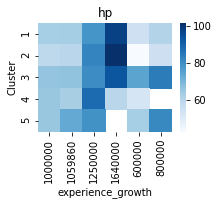

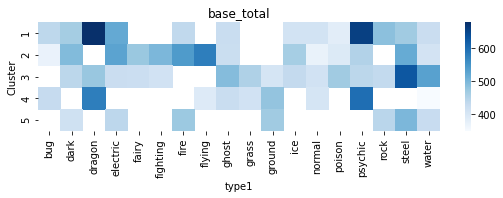

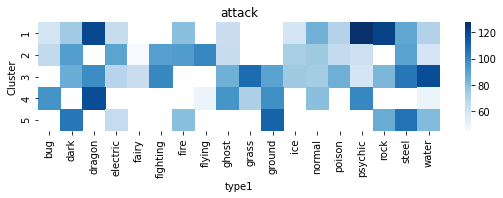

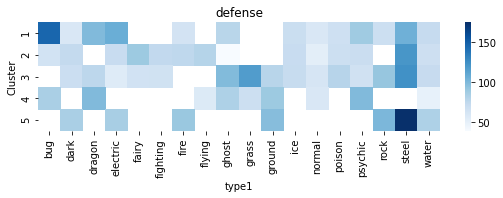

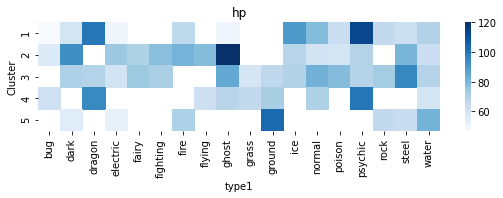

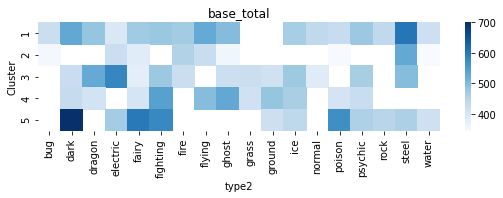

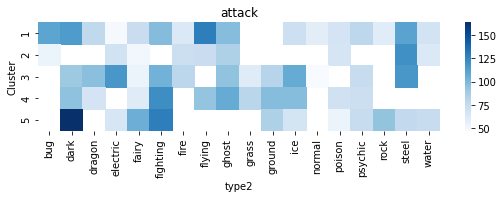

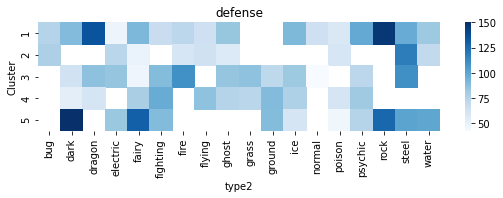

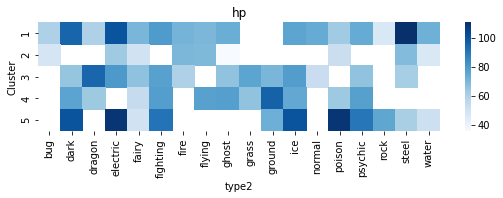

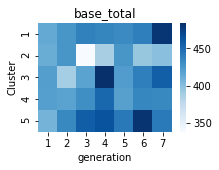

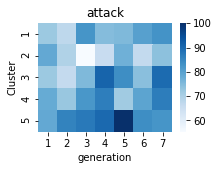

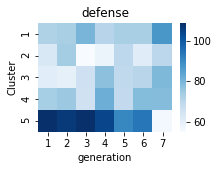

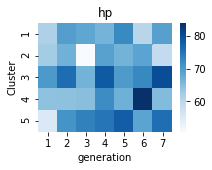

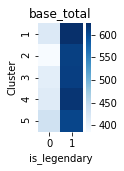

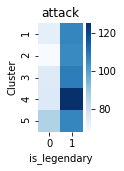

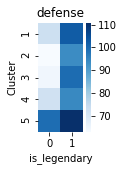

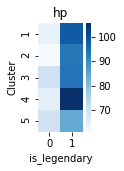

In [29]:
df['Cluster'] = Xa['Cluster']

for col in cat[:-1]:
    for val in ['base_total','attack','defense','hp']:    
        fig, ax = plt.subplots(figsize=(int(len(set(df[col]))/2),2)) 
        ax.set_title(val)
        display(sns.heatmap(df.pivot_table(index = 'Cluster', 
                                   columns = col,
                                   values = val), 
                            cmap = 'Blues', 
                            ax = ax))
        

<AxesSubplot:title={'center':'base_total'}, xlabel='experience_growth', ylabel='Cluster'>

<AxesSubplot:title={'center':'base_total'}, xlabel='type1', ylabel='Cluster'>

<AxesSubplot:title={'center':'base_total'}, xlabel='type2', ylabel='Cluster'>

<AxesSubplot:title={'center':'base_total'}, xlabel='generation', ylabel='Cluster'>

<AxesSubplot:title={'center':'base_total'}, xlabel='is_legendary', ylabel='Cluster'>

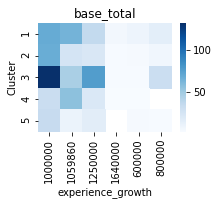

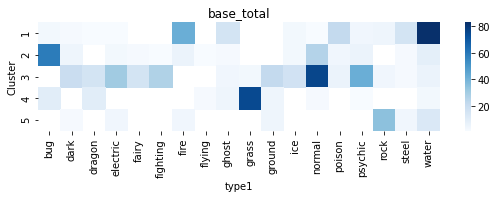

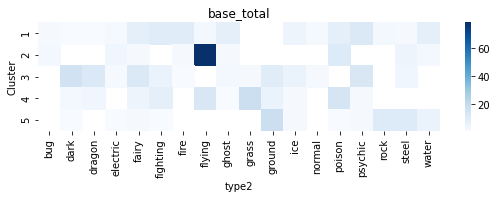

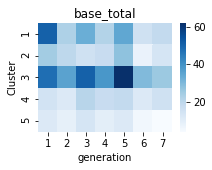

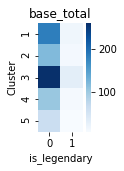

In [30]:
df['Cluster'] = Xa['Cluster']

for col in cat[:-1]:
    for val in ['base_total']:    
        fig, ax = plt.subplots(figsize=(int(len(set(df[col]))/2),2)) 
        ax.set_title(val)
        display(sns.heatmap(df.pivot_table(index = 'Cluster', 
                                   columns = col,
                                   values = val, aggfunc = 'count'), 
                            cmap = 'Blues', 
                            ax = ax))
        

In [32]:
df[num + ['Cluster']].groupby('Cluster')[num].mean().transpose()

Cluster,1,2,3,4,5
abilities,2.36,2.43,2.57,2.35,2.81
against_bug,0.73,0.62,1.15,1.56,0.89
against_dark,1.16,1.04,1.03,1.01,0.99
against_dragon,0.93,0.94,0.99,1.08,0.86
against_electric,1.45,1.72,0.80,0.53,0.78
against_fairy,0.80,0.93,1.31,1.18,0.90
against_fight,0.87,0.57,1.29,0.80,2.07
against_fire,0.74,1.49,1.05,1.90,0.71
against_flying,0.99,1.40,1.05,2.08,0.55
against_ghost,1.19,0.86,0.87,1.05,1.01


In [36]:
df.groupby('Cluster').agg(lambda x: x.value_counts().index[0])

,experience_growth,type1,type2,generation,is_legendary,types,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_total,capture_rate,defense,hp,sp_attack,sp_defense,speed,bug,dark,dragon,electric,fairy,fighting,fire,flying,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1000000,water,psychic,1,0,water,3,1.00,1.00,1.00,1.00,1.00,1.00,0.50,1.00,1.00,2.00,1.00,0.50,1.00,1.00,1.00,1.00,0.50,0.50,65,5120,405,45.00,60,50,70,50,65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1000000,bug,flying,5,0,normal flying,3,0.50,1.00,1.00,2.00,1.00,0.50,1.00,1.00,1.00,0.50,0.00,2.00,1.00,1.00,1.00,2.00,1.00,1.00,90,3840,580,45.00,50,40,40,50,65,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1000000,normal,dark,5,0,normal,3,1.00,1.00,1.00,1.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,120,5120,300,45.00,70,60,60,60,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1059860,grass,grass,3,0,grass,2,2.00,1.00,1.00,0.50,1.00,1.00,2.00,2.00,1.00,0.50,0.50,2.00,1.00,2.00,1.00,1.00,1.00,0.50,100,5120,405,45.00,70,60,60,80,30,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,1000000,rock,ground,3,0,rock,3,1.00,1.00,1.00,1.00,1.00,2.00,0.50,0.50,1.00,4.00,2.00,1.00,0.50,0.50,1.00,0.50,2.00,2.00,85,5120,495,45.00,100,70,65,65,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [48]:
aux =df[[x for x in df.columns if x.startswith('against')]]
for col in aux.columns:
    display(aux[col].sort_values(ascending = False).head().reset_index())

,name,against_bug
0,Inkay,4.00
1,Cacturne,4.00
2,Malamar,4.00
3,Exeggcute,4.00
4,Exeggutor,4.00


,name,against_dark
0,Lunala,4.00
1,Hoopa,4.00
2,Decidueye,2.00
3,Meloetta,2.00
4,Pumpkaboo,2.00


,name,against_dragon
0,Kingdra,2.00
1,Noibat,2.00
2,Axew,2.00
3,Fraxure,2.00
4,Haxorus,2.00


,name,against_electric
0,Swanna,4.00
1,Mantine,4.00
2,Mantyke,4.00
3,Ducklett,4.00
4,Gyarados,4.00


,name,against_fairy
0,Hakamo-o,4.00
1,Scraggy,4.00
2,Deino,4.00
3,Scrafty,4.00
4,Hydreigon,4.00


,name,against_fight
0,Aggron,4.00
1,Tyranitar,4.00
2,Pawniard,4.00
3,Probopass,4.00
4,Sneasel,4.00


,name,against_fire
0,Durant,4.00
1,Paras,4.00
2,Sewaddle,4.00
3,Swadloon,4.00
4,Leavanny,4.00


,name,against_flying
0,Parasect,4.00
1,Virizion,4.00
2,Paras,4.00
3,Breloom,4.00
4,Heracross,4.00


,name,against_ghost
0,Hoopa,4.00
1,Lunala,4.00
2,Doublade,2.00
3,Exeggcute,2.00
4,Exeggutor,2.00


,name,against_grass
0,Binacle,4.00
1,Palpitoad,4.00
2,Rhyperior,4.00
3,Whiscash,4.00
4,Kabutops,4.00


,name,against_ground
0,Magneton,4.00
1,Bastiodon,4.00
2,Salazzle,4.00
3,Salandit,4.00
4,Heatran,4.00


,name,against_ice
0,Vibrava,4.00
1,Garchomp,4.00
2,Rayquaza,4.00
3,Dragonite,4.00
4,Gliscor,4.00


,name,against_normal
0,Bibarel,1.00
1,Lombre,1.00
2,Ralts,1.00
3,Pelipper,1.00
4,Wingull,1.00


,name,against_poison
0,Shiinotic,4.00
1,Morelull,4.00
2,Cottonee,4.00
3,Whimsicott,4.00
4,Tapu Bulu,4.00


,name,against_psychic
0,Croagunk,4.00
1,Toxicroak,4.00
2,Bulbasaur,2.00
3,Koffing,2.00
4,Haunter,2.00


,name,against_rock
0,Butterfree,4.00
1,Yanmega,4.00
2,Yanma,4.00
3,Masquerain,4.00
4,Mothim,4.00


,name,against_steel
0,Carbink,4.00
1,Diancie,4.00
2,Amaura,4.00
3,Aurorus,4.00
4,Roggenrola,2.00


,name,against_water
0,Geodude,4.00
1,Magcargo,4.00
2,Numel,4.00
3,Camerupt,4.00
4,Rhydon,4.00
